In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.grid'] = True
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['legend.loc'] = 'upper right'
plt.rcParams['axes.titlesize'] = 12

53.75
[103.75 211.25]
63.0 145.0
174.0 247.0

57.18085106382979
[107.18085106 207.81914894]
67.0 155.0
169.0 264.0

60.39325842696629
[110.39325843 204.60674157]
68.0 153.0
157.0 253.0

64.75903614457832
[114.75903614 200.24096386]
66.0 164.0
155.0 263.0

68.91025641025641
[118.91025641 196.08974359]
68.0 175.0
143.0 251.0

74.65277777777779
[124.65277778 190.34722222]
63.0 181.0
132.0 245.0

80.22388059701494
[130.2238806 184.7761194]
74.0 205.0
125.0 222.0

88.11475409836066
[138.1147541 176.8852459]
74.0 196.0
106.0 245.0

95.98214285714285
[145.98214286 169.01785714]
72.0 226.0
94.0 238.0

107.5
[157.5 157.5]
79.0 253.0
85.0 246.0



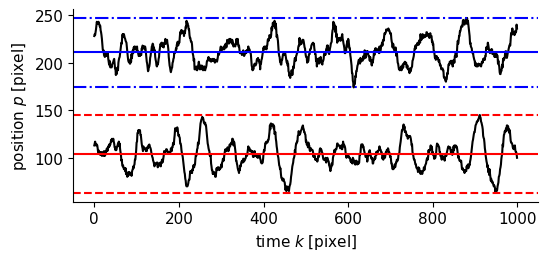

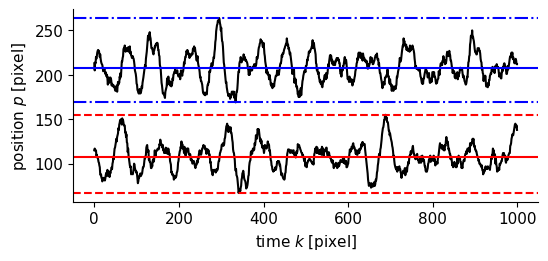

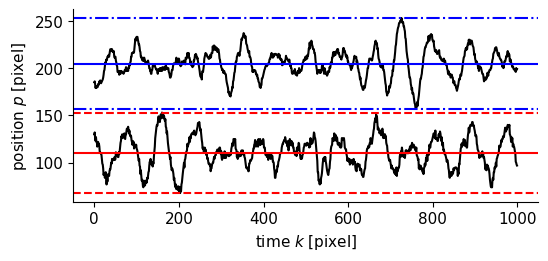

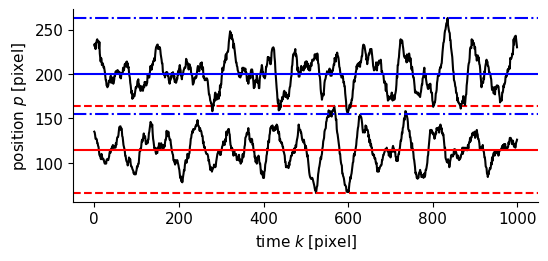

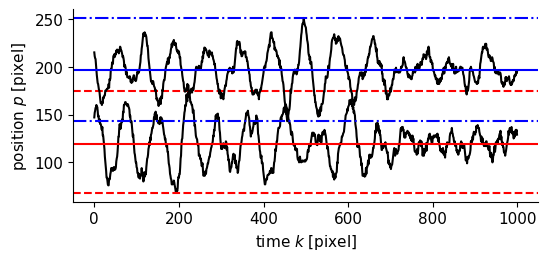

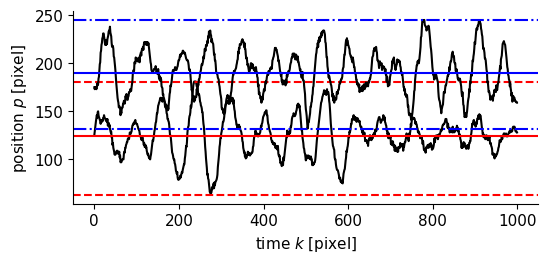

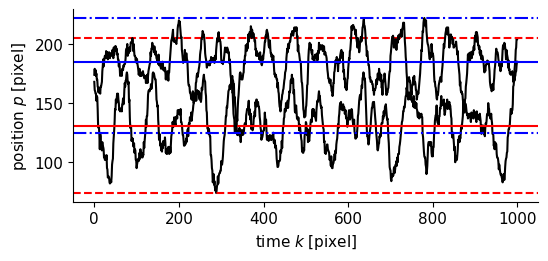

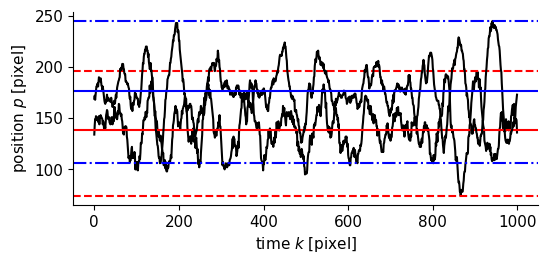

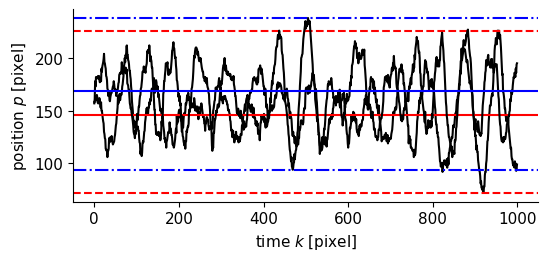

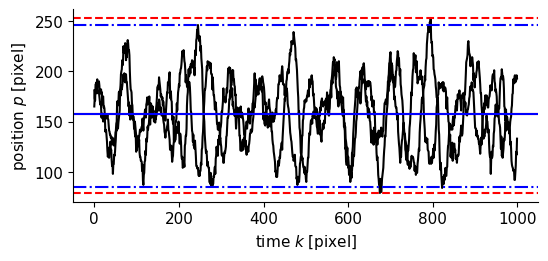

In [8]:
overlaps = ["00", "06", "11", "17", "22", "28", "33", "39", "44", "50"]
overlap_values = [0, 0.06, 0.11, 0.17, 0.22, 0.28, 0.33, 0.39, 0.44, 0.5]
colors = ['r', 'b', 'k', 'g', 'm', 'c', 'y', 'orange', 'purple', 'pink']
linestyles = ['--', '-.', '--', '-.', '--', '-.']

for j, overlap in enumerate(overlaps):
    image_path =  (
        r"D:\Courses\Uclouvain\thesis\code\thesis_Colin\seismogram_curve_extraction\data_2_traces\resampled\BE_UCC__HHE_2024-01-01T00-06-00_2024-01-14T00-12-00_1000_1_0-1\overlap_0-"
        + overlap
        + r"\signals\image_00005.jpg"
    )

    GT_path = (
        r"D:\Courses\Uclouvain\thesis\code\thesis_Colin\seismogram_curve_extraction\data_2_traces\resampled\BE_UCC__HHE_2024-01-01T00-06-00_2024-01-14T00-12-00_1000_1_0-1\overlap_0-"
        + overlap
        + r"\ground_truth\sample_00005.npy"
    )   

    ground_truth = np.load(GT_path)
    max = ground_truth.max(axis=1)
    min = ground_truth.min(axis=1)

    image_source = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE).astype(np.float32)
    image_source = image_source.astype(np.float32) / 255.0  # Normalize to [0, 1]
    image_source = image_source.max() - image_source  # Invert the image
    # print("image shape", image_source.shape)
    height, width = image_source.shape
    t_margin, b_margin = 50, 50
    num_signals = 2

    plt.figure(figsize=(6, 2.5))
    # plt.imshow(image_source.max()-image_source, cmap='gray', origin='lower')
    plt.xlabel(r"time $k$ [pixel]")
    plt.ylabel(r"position $p$ [pixel]")
    
    available_height = height - t_margin - b_margin
    max_amplitude = (available_height / num_signals) / (1 - overlap_values[j])
    print(max_amplitude/2)
    vertical_offsets = np.linspace(t_margin + max_amplitude / 2, height - b_margin - max_amplitude / 2, num_signals)
    print(vertical_offsets)
    print(min[0], max[0])
    print(min[1], max[1])
    for i in range(len(max)):
        plt.plot(ground_truth[i], color='k')
        if i <2:
            plt.axhline(y=max[i], color=colors[i], linestyle=linestyles[i])
            plt.axhline(y=vertical_offsets[i], color=colors[i], linestyle='-')
            plt.axhline(y=min[i], color=colors[i], linestyle=linestyles[i])

    plt.grid(False)
    print()

    save_path = r"output_overlap\resampled\2_curves\overlap_{}.pdf".format(overlap)
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(save_path, bbox_inches='tight', dpi=300, format='pdf')